
Project Title: Titanic Survival Prediction
Author: Shahid
Date: 21 February 2026

Description:
This project builds machine learning models to predict whether a passenger
survived the Titanic disaster using demographic and travel-related features.
"""

### import Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [19]:
df = pd.read_csv(r"D:\datasets\Titanic-Dataset.csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [20]:
#Preview the Data
print("Shape : ",df.shape)
print("Size : ",df.size)
print("No.of Dimensions : ",df.ndim)
print("Unique : ",df.nunique)
print("Columns : ",df.columns)
print("Index : ",df.index)

Shape :  (891, 12)
Size :  10692
No.of Dimensions :  2
Unique :  <bound method DataFrame.nunique of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William

In [21]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
#Check for DUPLICATES & NULL values
print("Duplicates : ",df.duplicated().sum())
print("Null values : \n\n",df.isnull().sum())

Duplicates :  0
Null values : 

 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [25]:
#Fill the NULL values and drop them if they are large in number
df["Age"]=df["Age"].fillna(df["Age"].mean())
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])
df=df.drop(columns=["Cabin"])

In [26]:
#Confirming 0 NULL values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [27]:
df["Survived"]=df["Survived"].map({0:"Died",1:"Survived"})

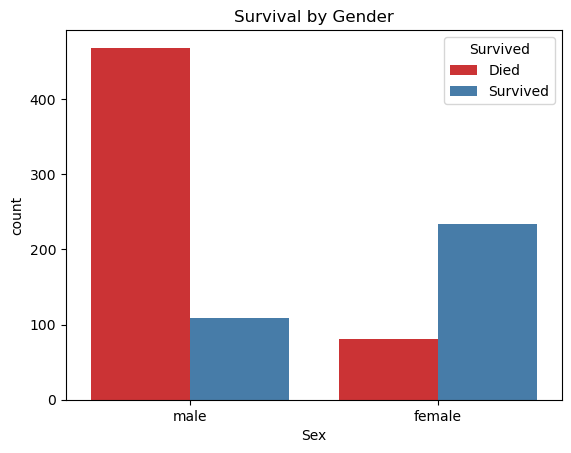

In [28]:
# Survival by Gender
# most of the MALE had Died.
# Most of the FEMALE had Survived.
sns.countplot(data=df,x="Sex",hue="Survived",palette="Set1")
plt.title("Survival by Gender")
plt.show()

### Label Encoding of Categorical Variables

In [29]:
#Label Encoding

le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df['Embarked']=le.fit_transform(df["Embarked"])

### Feature Selection and Train-Test Split




In [30]:
#Feature Selection & Train Test Split

def preprocess_data():
    features=["Age","Sex","Embarked","Pclass","SibSp","Parch","Fare"]
    X=df[features]
    y=df["Survived"]
    return train_test_split(X,y,test_size=0.2,random_state=42)
if __name__=="__main__":
    X_train,X_test,y_train,y_test=preprocess_data()
    print("Data Preprocessing Complete!!!")
    print(f"Train shape : {X_train.shape}\n Test shape : {X_test.shape}\n")
    print(f'Sample X:\n{X_train.head()}')

Data Preprocessing Complete!!!
Train shape : (712, 7)
 Test shape : (179, 7)

Sample X:
      Age  Sex  Embarked  Pclass  SibSp  Parch     Fare
331  45.5    1         2       1      0      0  28.5000
733  23.0    1         2       2      0      0  13.0000
382  32.0    1         2       3      0      0   7.9250
704  26.0    1         2       3      1      0   7.8542
813   6.0    0         2       3      4      2  31.2750


### 
* In this step relevant features such as Age, Sex, Embarked, Pclass, SibSp, Parch, and Fare were selected to train the model. The target variable used was Survived.

* The dataset was split into 80% training data and 20% testing data using train_test_split(). This ensures the model is trained on one portion of the data and evaluated on unseen data for reliable performance measurement.

In [31]:
df["Age"]=df["Age"].fillna(df["Age"].mode()[0])
df["Embarked"]= df["Embarked"].fillna(df["Embarked"].mode()[0])

### Model Training – Decision Tree Classifier

In [32]:
#Model Training - DecisionTree Classifier

dt=tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("Decision Tree Classifier",dt.score(X_test,y_test))
y_pred=dt.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Classification : \n",classification_report(y_test,y_pred))

Decision Tree Classifier 0.7877094972067039
Accuracy :  0.7877094972067039
Classification : 
               precision    recall  f1-score   support

        Died       0.82      0.82      0.82       105
    Survived       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



### Why Decision Tree?

* A Decision Tree is a supervised machine learning algorithm used for classification and regression tasks. It works by splitting the dataset into branches based on feature values to make decisions.
* It is:
Easy to interpret
Non-linear
Handles both numerical and categorical features

> How the Model Works

The Decision Tree:
* Selects the best feature for splitting (based on Gini impurity or entropy).
* Divides the dataset into subsets.
* Repeats the process recursively.
* Creates a tree-like structure of decisions.
* Outputs a class prediction (Survived / Not Survived).

In [33]:
#Model Training - RandomForest Classifier

rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
print("Random Forest Classifier Accuracy : ",rf.score(X_test,y_test))
y_pred=rf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Classification : \n",classification_report(y_test,y_pred))

Random Forest Classifier Accuracy :  0.8100558659217877
Accuracy :  0.8100558659217877
Classification : 
               precision    recall  f1-score   support

        Died       0.83      0.86      0.84       105
    Survived       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [34]:
#Model Training - Logistic Regression

lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
print("Logistic Regression accuracy : ",lr.score(X_test,y_test))
y_pred=lr.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Classification : \n",classification_report(y_test,y_pred))

Logistic Regression accuracy :  0.8100558659217877
Accuracy :  0.8100558659217877
Classification : 
               precision    recall  f1-score   support

        Died       0.83      0.86      0.84       105
    Survived       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



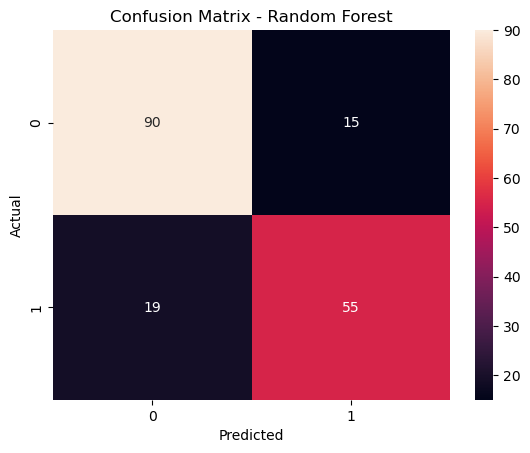

In [38]:
# Confusion Matrix for Logistic Regression & Random Forest 

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Feature Importance Analysis

In [39]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
print(feature_importances.sort_values(ascending=False))

Fare        0.274935
Sex         0.270030
Age         0.249270
Pclass      0.082772
SibSp       0.048797
Parch       0.040057
Embarked    0.034139
dtype: float64


### Model Performance Comparison

In [40]:
print("Decision Tree:", dt.score(X_test,y_test))
print("Random Forest:", rf.score(X_test,y_test))
print("Logistic Regression:", lr.score(X_test,y_test))

Decision Tree: 0.7877094972067039
Random Forest: 0.8100558659217877
Logistic Regression: 0.8100558659217877


### Insights from the Analysis
* 1  Data Quality Observations

The dataset contained missing values in Age, Cabin, and Embarked.

Cabin had a large number of missing values and was removed.

Missing values in Age and Embarked were handled using statistical imputation.

No major duplicate records were found.

This ensured the dataset was clean before model training.

* 2 Feature-Level Insights

Based on the Random Forest Feature Importance Analysis, the most influential variables were:

Sex – Strongest predictor of survival

Fare – Higher fare passengers had better survival probability

Pclass – First-class passengers were more likely to survive

Age – Younger passengers had relatively higher survival chances

This indicates that gender and socio-economic status played a major role in survival outcomes.

* 3 Model Performance Insights

Three models were trained and evaluated:

Decision Tree

Random Forest

Logistic Regression

Observations:

Random Forest achieved the highest accuracy among the three models.

Logistic Regression performed competitively and provided stable results.

Decision Tree performed slightly lower, likely due to overfitting.

This comparison shows that ensemble methods (Random Forest) provide better generalization performance.

* 4 Confusion Matrix Insight

The confusion matrix showed:

Good prediction performance for non-survivors.

Reasonable balance between precision and recall.

Some misclassifications occurred, especially in borderline cases.

This indicates that while the model performs well, it is not perfect — which is expected in real-world classification problems.

 Final Conclusion

In this project, a machine learning pipeline was successfully implemented to predict Titanic passenger survival.

The workflow included:

Data exploration and cleaning

Handling missing values

Feature encoding

Feature selection

Model training using three classification algorithms

Model comparison

Feature importance analysis

Among all models, Random Forest emerged as the best-performing model, demonstrating strong predictive capability.

The analysis revealed that:

Gender was the most critical survival factor.

Passengers from higher socio-economic classes had better survival chances.

Age and fare also significantly influenced outcomes.

Overall, this project demonstrates practical understanding of:

Data preprocessing

Supervised machine learning

Model evaluation

Model comparison

Interpretability using feature importance

This project successfully answers the problem statement:

Building a model to predict whether a passenger survived the Titanic disaster using available passenger information.